# Chapter 10 - Regression Analysis

This notebook contains code accompanying Chapter 10 Regression Analysis in *Practical Discrete Mathematics* by Ryan T. White and Archana Tikayat Ray.

## Auto Dataset

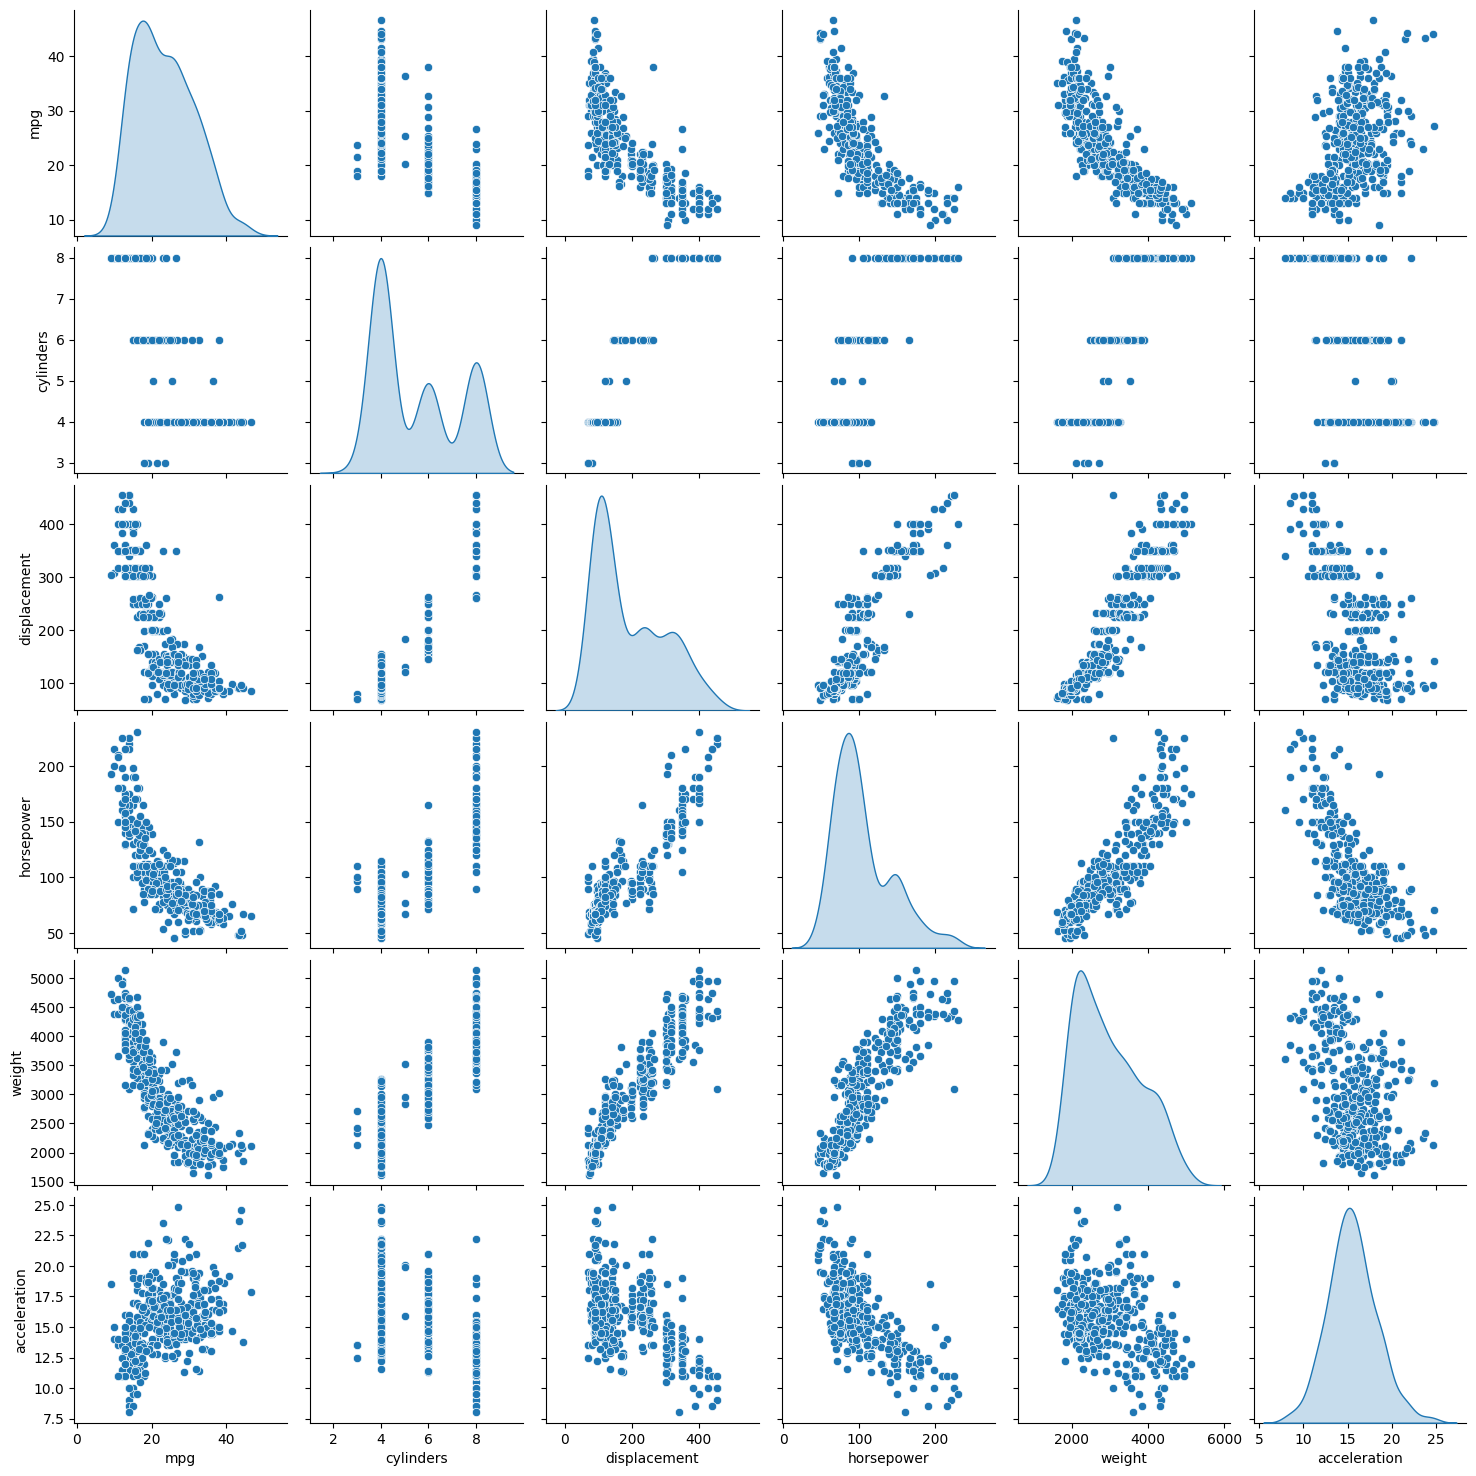

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the csv file
df = pd.read_csv("auto_dataset.csv",index_col=0)

#Plotting the pairplot
sns.pairplot(df, diag_kind="kde")
plt.show()

## Least-squares lines with `NumPy`

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# find the shape of the auto dataset
df = pd.read_csv("auto_dataset.csv")
df.shape

(392, 7)

In [ ]:
X = df["weight"]
Y = df["horsepower"]

X_b = np.c_[np.ones((392,1)),X] #here we are adding X_o = 1 to all the feature values
beta_values = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

print(beta_values)

[-12.1834847    0.03917702]


In [ ]:
X_new = np.array([[2500],[2045]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(beta_values)

print(f"Weight of car = 2500; predicted horsepower is {y_predict[0]:.3}; actual horsepower is 88")
print(f"Weight of car = 2045; predicted horsepower is {y_predict[1]:.3}; actual horsepower is 68")

Weight of car = 2500; predicted horsepower is 85.8; actual horsepower is 88
Weight of car = 2045; predicted horsepower is 67.9; actual horsepower is 68


In [2]:
X_plot= np.array([[1500],[6000]])
X_plot_b = np.c_[np.ones((2,1)),X_plot]
Y_plot = X_plot_b.dot(beta_values)

Equationline = "Y = {:.3f}+{:.3f}X".format(beta_values[0], beta_values[1])

plt.plot(X_plot, Y_plot, "r-", label = Equationline)
sns.scatterplot(X,Y, label = "Training Data")
plt.legend()
plt.show()

NameError: name 'beta_values' is not defined

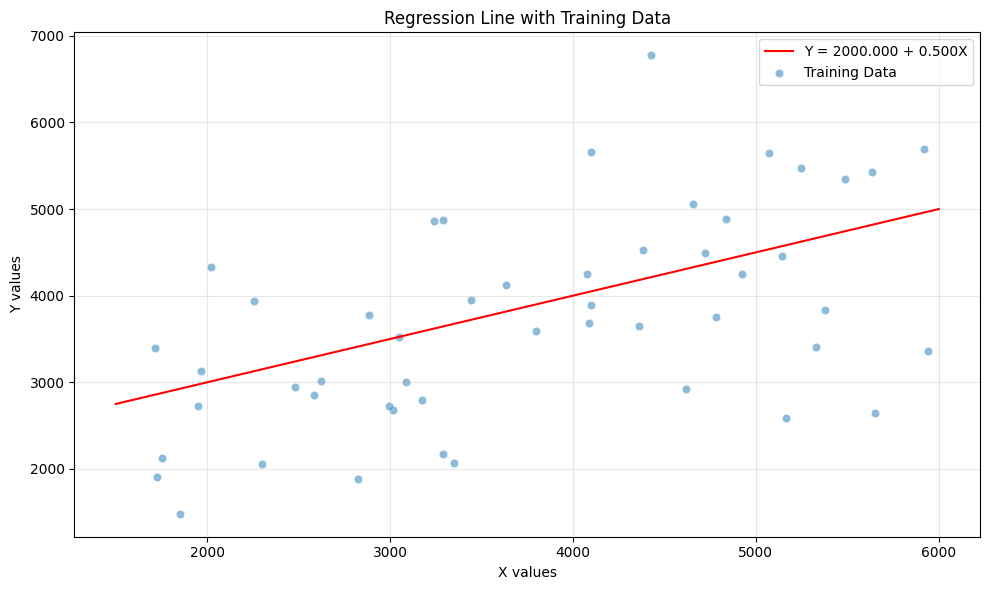

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and Y are your original data points
# and beta_values contains your regression coefficients
# If you don't have these, here's how to create sample data:
X = np.random.uniform(1500, 6000, 50)  # Sample data points
Y = 2000 + 0.5 * X + np.random.normal(0, 1000, 50)  # Sample target values with noise
beta_values = np.array([2000, 0.5])  # Sample regression coefficients

# Create points for plotting the regression line
X_plot = np.array([[1500], [6000]])  # Min and max x-values for the line
X_plot_b = np.c_[np.ones((2, 1)), X_plot]  # Add bias term
Y_plot = X_plot_b.dot(beta_values)  # Calculate corresponding y-values

# Create the plot
plt.figure(figsize=(10, 6))

# Plot regression line
equation_line = f"Y = {beta_values[0]:.3f} + {beta_values[1]:.3f}X"
plt.plot(X_plot, Y_plot, "r-", label=equation_line)

# Plot scatter points
sns.scatterplot(x=X, y=Y, label="Training Data", alpha=0.5)

# Customize the plot
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Regression Line with Training Data')
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

Next, we show how to find the model with scikit-learn.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
df = pd.read_csv("auto_dataset.csv")

X = df["weight"]
Y = df["horsepower"]

X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

reg.fit(X, Y)

print("The value obtained for beta_o is:", reg.intercept_)
print("The value obtained for beta_1 is:", reg.coef_[0])

The value obtained for beta_o is: [-12.1834847]
The value obtained for beta_1 is: [0.03917702]


In [ ]:
# predict the output from a new datapoint
X_new = np.array([[2500],[2045]])
print(reg.predict(X_new))

[[85.75906307]
 [67.93351937]]


## Least-squares curves with `NumPy` and `SciPy`

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Importing the dataset as a pandas dataframe
df = pd.read_csv("auto_dataset.csv")

#Selecting the variables of interest
X = df["horsepower"]
y = df["mpg"]

#Converting the series to a column matrix
X_new = X.values.reshape(-1,1)
y_new = y.values.reshape(-1,1)

#Fitting y = beta0 + beta1x + beta2x^2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_new)

reg = LinearRegression()
reg.fit(X_poly, y_new)

print("Y = {:.4f} X^2 {:.3f} X + {:.3f}".format(reg.coef_[0,1], reg.coef_[0,0], reg.intercept_[0]))

Y = 0.0012 X^2 -0.466 X + 56.900


Let's plot the model.

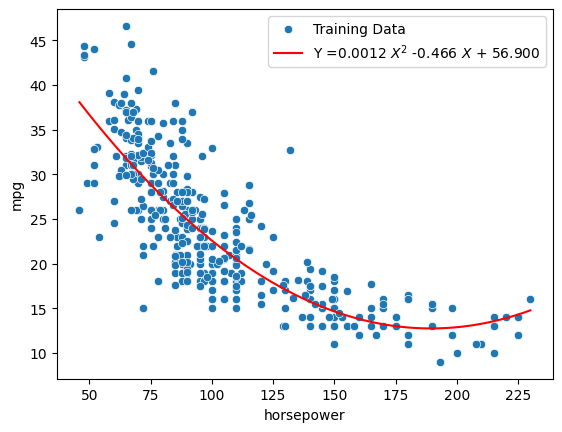

In [11]:
start = df["horsepower"].values.min()
stop = df["horsepower"].values.max()

X_plot = np.linspace(start, stop, 1000)
# Accessing the coefficients correctly for polynomial regression
Y_plot = reg.coef_[0][1] * X_plot * X_plot + reg.coef_[0][0] * X_plot + reg.intercept_[0]

Equationline = "Y ={:.4f} $X^2$ {:.3f} $X$ + {:.3f}".format(reg.coef_[0][1], reg.coef_[0][0], reg.intercept_[0])

# Pass data as a DataFrame or using 'x' and 'y' keywords
sns.scatterplot(x='horsepower', y='mpg', data=df, label="Training Data") # Changed this line to use 'x' and 'y' keywords
plt.plot(X_plot, Y_plot, "r-", label=Equationline)
plt.legend()
plt.show()

### Least-squares surfaces with `NumPy` and `SciPy`

In [6]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#Importing the csv file and choosing the X and Y variables
df = pd.read_csv("auto_dataset.csv")

Y = df["displacement"]
X = df[["horsepower","weight"]]

#Fitting the linear regression model
reg = LinearRegression()
reg.fit(X, Y)

# Printing the parameter values obtained after fitting the model
print("The value obtained for beta_o is: ", reg.intercept_)
print("The value obtained for beta_1 and beta_2 are: ",reg.coef_[0] , "and", reg.coef_[1] )

The value obtained for beta_o is:  -135.95073526530456
The value obtained for beta_1 and beta_2 are:  0.9757143655155813 and 0.07671670340152593


Let's plot the model.

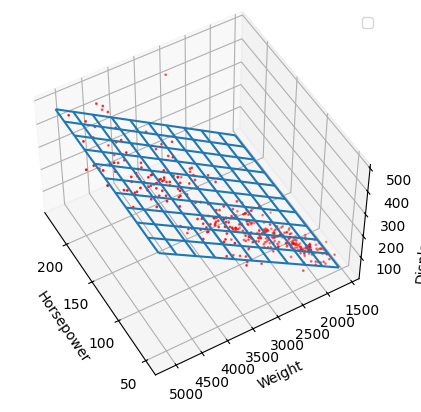

In [7]:
# Plotting the surface plot
X1_min = df["horsepower"].values.min()
X1_max = df["horsepower"].values.max()
X1_values = np.linspace(X1_min, X1_max, 100)

X2_min = df["weight"].values.min()
X2_max = df["weight"].values.max()
X2_values = np.linspace(X2_min, X2_max, 100)

Y_reg = reg.intercept_ + (reg.coef_[0] * X1_values) + (reg.coef_[1] * X2_values)
Y_plot = Y_reg.reshape(-1,1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.horsepower, X.weight, Y, color="red", s=1)

X1_plot, X2_plot = np.meshgrid(X1_values, X2_values)
surf = ax.plot_wireframe(X1_plot, X2_plot, Y_plot, rstride=10, cstride=10)

ax.view_init(50, 150)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('Displacement')
plt.legend()
plt.show()

Q2

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

# Create sample data (replace this with your actual data)
np.random.seed(42)
n_samples = 100

# Generate sample features
weight = np.random.uniform(2000, 5000, n_samples)
acceleration = np.random.uniform(8, 25, n_samples)
mpg = np.random.uniform(10, 40, n_samples)

# Generate sample target (horsepower) with some relationship to features
horsepower = 0.1 * weight - 5 * acceleration - 2 * mpg + np.random.normal(0, 20, n_samples)

# Create feature matrix X and target vector y
X = np.column_stack([weight, acceleration, mpg])
y = horsepower

# Train the model
model = LinearRegression()
model.fit(X, y)

# Create meshgrid for 3D surface
weight_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
accel_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
W, A = np.meshgrid(weight_range, accel_range)

# Create predictions for the surface
# Using median MPG for the third dimension
median_mpg = np.median(X[:, 2])
Z = np.zeros_like(W)
for i in range(len(weight_range)):
    for j in range(len(accel_range)):
        Z[i,j] = model.predict([[weight_range[i], accel_range[j], median_mpg]])[0]

# Create the 3D plot
fig = go.Figure(data=[
    # Plot the prediction surface
    go.Surface(x=W, y=A, z=Z, opacity=0.7,
              colorscale='viridis',
              name='Prediction Surface'),

    # Plot the actual data points
    go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y,
                 mode='markers',
                 marker=dict(size=5, color='red'),
                 name='Actual Data')
])

# Update layout
fig.update_layout(
    title='Horsepower Prediction 3D Plot',
    scene=dict(
        xaxis_title='Weight',
        yaxis_title='Acceleration',
        zaxis_title='Horsepower'
    ),
    width=800,
    height=800
)

# Add annotation about MPG
fig.add_annotation(
    text=f'MPG fixed at median: {median_mpg:.1f}',
    xref="paper", yref="paper",
    x=0, y=1,
    showarrow=False
)

fig.show()

# Print model coefficients
print("\nModel Coefficients:")
print(f"Weight: {model.coef_[0]:.4f}")
print(f"Acceleration: {model.coef_[1]:.4f}")
print(f"MPG: {model.coef_[2]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")


Model Coefficients:
Weight: 0.1028
Acceleration: -4.7546
MPG: -1.7804
Intercept: -17.7048
